In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
penguins = sns.load_dataset("penguins")
df = penguins.copy()
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


In [39]:
df = df.dropna()
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male


In [40]:
df.shape[0]

333

In [41]:
for item in df.columns:
    print(f"{item} -> {df[item].unique().shape[0]}")

species -> 3
island -> 3
bill_length_mm -> 163
bill_depth_mm -> 79
flipper_length_mm -> 54
body_mass_g -> 93
sex -> 2


In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 333 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            333 non-null    object 
 1   island             333 non-null    object 
 2   bill_length_mm     333 non-null    float64
 3   bill_depth_mm      333 non-null    float64
 4   flipper_length_mm  333 non-null    float64
 5   body_mass_g        333 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 20.8+ KB


In [43]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
bill_length_mm,333.0,43.992793,5.468668,32.1,39.5,44.5,48.6,59.6
bill_depth_mm,333.0,17.164865,1.969235,13.1,15.6,17.3,18.7,21.5
flipper_length_mm,333.0,200.966967,14.015765,172.0,190.0,197.0,213.0,231.0
body_mass_g,333.0,4207.057057,805.215802,2700.0,3550.0,4050.0,4775.0,6300.0


# Pivot Table

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 333 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            333 non-null    object 
 1   island             333 non-null    object 
 2   bill_length_mm     333 non-null    float64
 3   bill_depth_mm      333 non-null    float64
 4   flipper_length_mm  333 non-null    float64
 5   body_mass_g        333 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 20.8+ KB


In [45]:
table = pd.pivot_table(data = df, index = ["species", "island", "sex"])
table

bill_depth_mm  bill_length_mm  body_mass_g  \
species   island    sex                                                  
Adelie    Biscoe    Female      17.704545       37.359091  3369.318182   
                    Male        19.036364       40.590909  4050.000000   
          Dream     Female      17.618519       36.911111  3344.444444   
                    Male        18.839286       40.071429  4045.535714   
          Torgersen Female      17.550000       37.554167  3395.833333   
                    Male        19.391304       40.586957  4034.782609   
Chinstrap Dream     Female      17.588235       46.573529  3527.205882   
                    Male        19.252941       51.094118  3938.970588   
Gentoo    Biscoe    Female      14.237931       45.563793  4679.741379   
                    Male        15.718033       49.473770  5484.836066   

                            flipper_length_mm  
species   island    sex                        
Adelie    Biscoe    Female         187.181818  
                    Male           190.409091  
          Dream     Female         187.851852  
                    Male           191.928571  
          Torgersen Female         188.291667  
                    Male           194.913043  
Chinstrap Dream     Female         191.735294  
                    Male           199.911765  
Gentoo    Biscoe    Female         212.706897  
                    Male           221.540984

In [46]:
table = pd.pivot_table(data = df, index = ["species", "island", "sex"], aggfunc={
    "bill_depth_mm":np.mean,
    "bill_length_mm":np.mean,
    "body_mass_g":np.mean,
    "flipper_length_mm":np.mean
})
table

bill_depth_mm  bill_length_mm  body_mass_g  \
species   island    sex                                                  
Adelie    Biscoe    Female      17.704545       37.359091  3369.318182   
                    Male        19.036364       40.590909  4050.000000   
          Dream     Female      17.618519       36.911111  3344.444444   
                    Male        18.839286       40.071429  4045.535714   
          Torgersen Female      17.550000       37.554167  3395.833333   
                    Male        19.391304       40.586957  4034.782609   
Chinstrap Dream     Female      17.588235       46.573529  3527.205882   
                    Male        19.252941       51.094118  3938.970588   
Gentoo    Biscoe    Female      14.237931       45.563793  4679.741379   
                    Male        15.718033       49.473770  5484.836066   

                            flipper_length_mm  
species   island    sex                        
Adelie    Biscoe    Female         187.181818  
                    Male           190.409091  
          Dream     Female         187.851852  
                    Male           191.928571  
          Torgersen Female         188.291667  
                    Male           194.913043  
Chinstrap Dream     Female         191.735294  
                    Male           199.911765  
Gentoo    Biscoe    Female         212.706897  
                    Male           221.540984

In [47]:
agglist = [np.mean, np.sum, np.max, np.min]
table = pd.pivot_table(data = df, index = ["species", "island", "sex"], aggfunc={
    "bill_depth_mm":agglist,
    "bill_length_mm":agglist,
    "body_mass_g":agglist,
    "flipper_length_mm":agglist
})
table

bill_depth_mm                          \
                                    amax  amin       mean    sum   
species   island    sex                                            
Adelie    Biscoe    Female          20.7  16.0  17.704545  389.5   
                    Male            21.1  17.2  19.036364  418.8   
          Dream     Female          19.3  15.5  17.618519  475.7   
                    Male            21.2  17.0  18.839286  527.5   
          Torgersen Female          19.3  15.9  17.550000  421.2   
                    Male            21.5  17.6  19.391304  446.0   
Chinstrap Dream     Female          19.4  16.4  17.588235  598.0   
                    Male            20.8  17.5  19.252941  654.6   
Gentoo    Biscoe    Female          15.5  13.1  14.237931  825.8   
                    Male            17.3  14.1  15.718033  958.8   

                           bill_length_mm                           \
                                     amax  amin       mean     sum   
species   island    sex                                              
Adelie    Biscoe    Female           40.5  34.5  37.359091   821.9   
                    Male             45.6  37.6  40.590909   893.0   
          Dream     Female           42.2  32.1  36.911111   996.6   
                    Male             44.1  36.3  40.071429  1122.0   
          Torgersen Female           41.1  33.5  37.554167   901.3   
                    Male             46.0  34.6  40.586957   933.5   
Chinstrap Dream     Female           58.0  40.9  46.573529  1583.5   
                    Male             55.8  48.5  51.094118  1737.2   
Gentoo    Biscoe    Female           50.5  40.9  45.563793  2642.7   
                    Male             59.6  44.4  49.473770  3017.9   

                           body_mass_g                                 \
                                  amax    amin         mean       sum   
species   island    sex                                                 
Adelie    Biscoe    Female      3900.0  2850.0  3369.318182   74125.0   
                    Male        4775.0  3550.0  4050.000000   89100.0   
          Dream     Female      3700.0  2900.0  3344.444444   90300.0   
                    Male        4650.0  3425.0  4045.535714  113275.0   
          Torgersen Female      3800.0  2900.0  3395.833333   81500.0   
                    Male        4700.0  3325.0  4034.782609   92800.0   
Chinstrap Dream     Female      4150.0  2700.0  3527.205882  119925.0   
                    Male        4800.0  3250.0  3938.970588  133925.0   
Gentoo    Biscoe    Female      5200.0  3950.0  4679.741379  271425.0   
                    Male        6300.0  4750.0  5484.836066  334575.0   

                           flipper_length_mm                              
                                        amax   amin        mean      sum  
species   island    sex                                                   
Adelie    Biscoe    Female             199.0  172.0  187.181818   4118.0  
                    Male               203.0  180.0  190.409091   4189.0  
          Dream     Female             202.0  178.0  187.851852   5072.0  
                    Male               208.0  178.0  191.928571   5374.0  
          Torgersen Female             196.0  176.0  188.291667   4519.0  
                    Male               210.0  181.0  194.913043   4483.0  
Chinstrap Dream     Female             202.0  178.0  191.735294   6519.0  
                    Male               212.0  187.0  199.911765   6797.0  
Gentoo    Biscoe    Female             222.0  203.0  212.706897  12337.0  
                    Male               231.0  208.0  221.540984  13514.0

In [48]:
table = pd.pivot_table(df, index = ["species", "island"], columns = ["sex"], aggfunc=np.mean)
table

bill_depth_mm            bill_length_mm             \
sex                        Female       Male         Female       Male   
species   island                                                         
Adelie    Biscoe        17.704545  19.036364      37.359091  40.590909   
          Dream         17.618519  18.839286      36.911111  40.071429   
          Torgersen     17.550000  19.391304      37.554167  40.586957   
Chinstrap Dream         17.588235  19.252941      46.573529  51.094118   
Gentoo    Biscoe        14.237931  15.718033      45.563793  49.473770   

                     body_mass_g              flipper_length_mm              
sex                       Female         Male            Female        Male  
species   island                                                             
Adelie    Biscoe     3369.318182  4050.000000        187.181818  190.409091  
          Dream      3344.444444  4045.535714        187.851852  191.928571  
          Torgersen  3395.833333  4034.782609        188.291667  194.913043  
Chinstrap Dream      3527.205882  3938.970588        191.735294  199.911765  
Gentoo    Biscoe     4679.741379  5484.836066        212.706897  221.540984

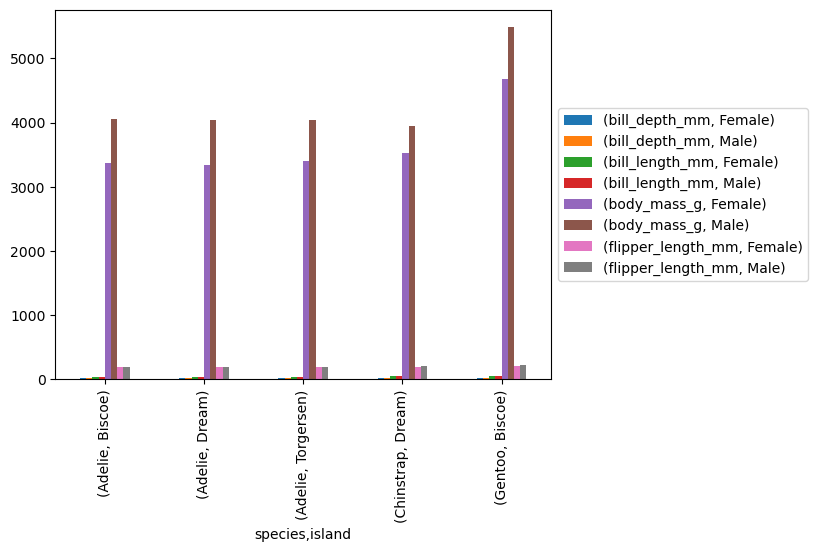

In [49]:
table.plot(kind = "bar")
plt.legend(loc = "center left", bbox_to_anchor = (1, 0.5))

# Kategorik Değişken

In [50]:
df.dtypes

species               object
island                object
bill_length_mm       float64
bill_depth_mm        float64
flipper_length_mm    float64
body_mass_g          float64
sex                   object
dtype: object

In [51]:
for item in df.columns:
    print(f"{item} -> {df[item].unique().shape[0]}")

species -> 3
island -> 3
bill_length_mm -> 163
bill_depth_mm -> 79
flipper_length_mm -> 54
body_mass_g -> 93
sex -> 2


AxesSubplot(0.125,0.653529;0.775x0.226471)
AxesSubplot(0.125,0.381765;0.775x0.226471)
AxesSubplot(0.125,0.11;0.775x0.226471)


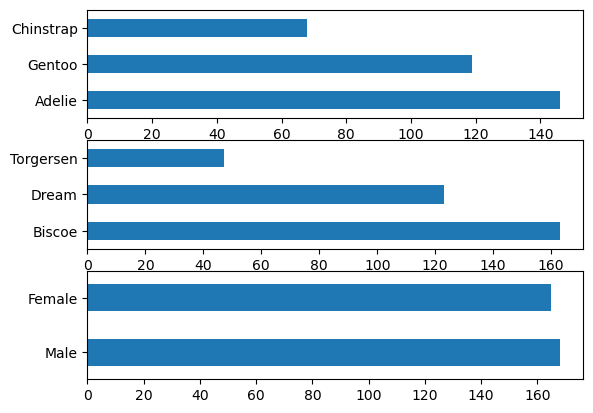

In [52]:
sayac = 1
for item in df.select_dtypes(include = ["category", "object"]):
    plt.subplot(len(df.select_dtypes(include = ["category", "object"]).columns), 1, sayac)
    print(df[item].value_counts().plot.barh())
    sayac = sayac+1

# BarPlot

In [64]:
num_list =  list(df.select_dtypes(include = ["float64", "int64"]).columns)
cat_list = list(df.select_dtypes(include = ["category", "object"]).columns)

In [65]:
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male


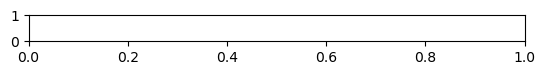

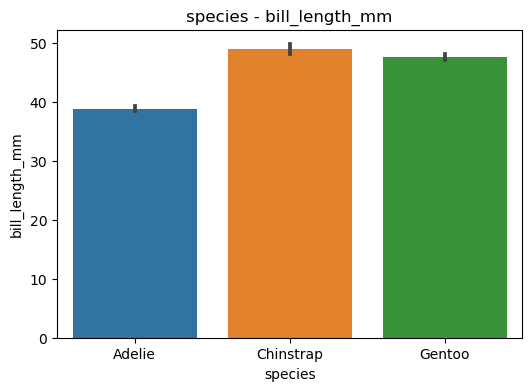

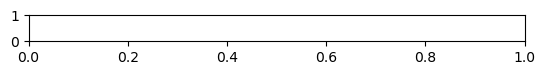

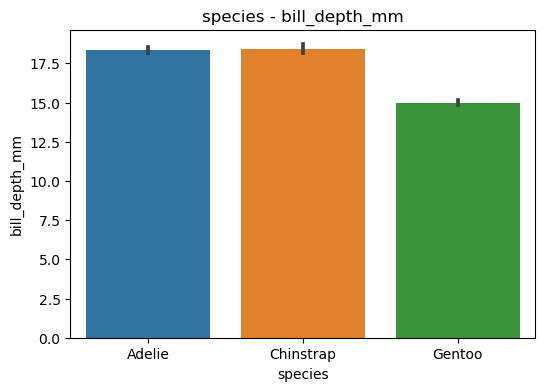

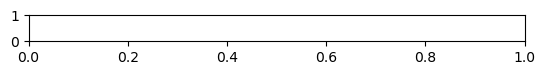

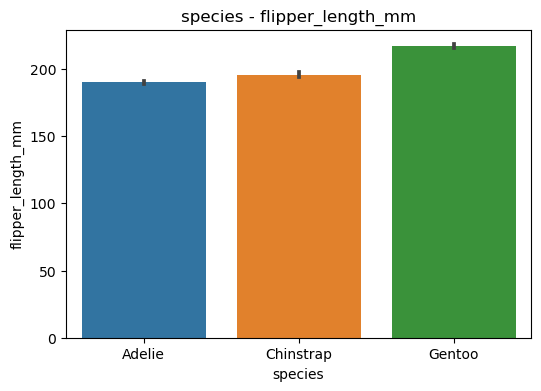

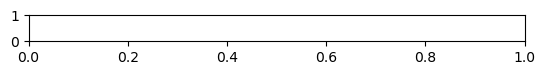

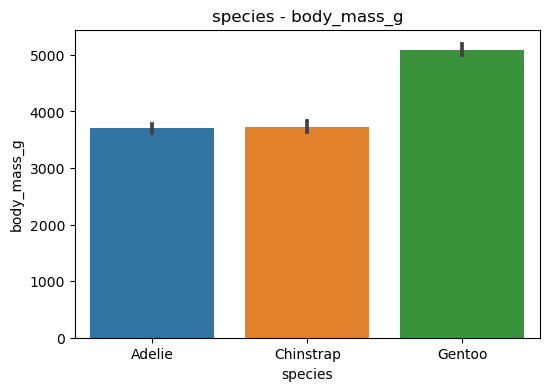

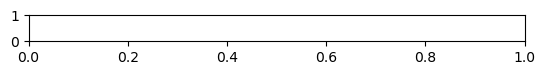

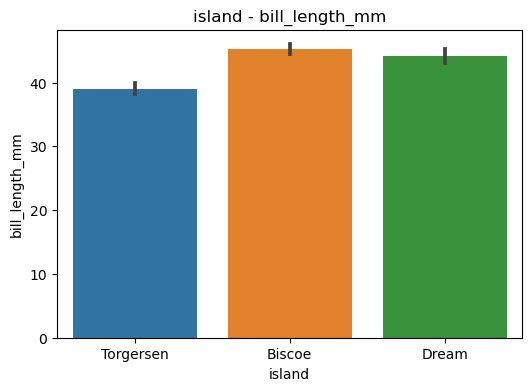

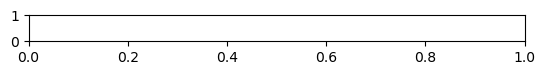

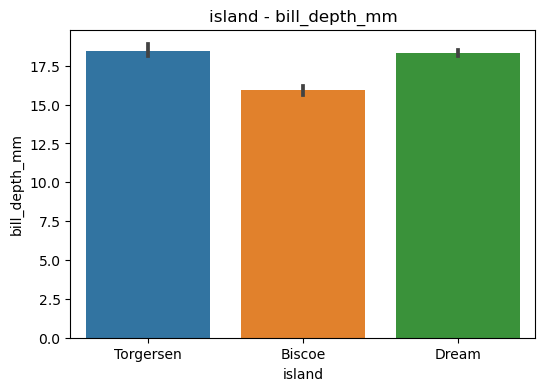

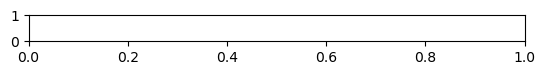

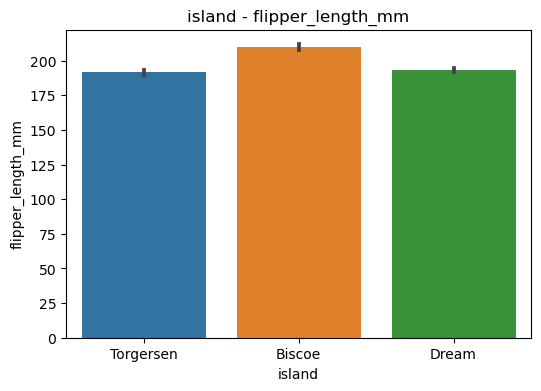

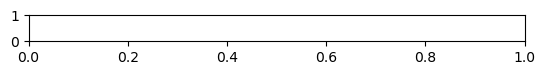

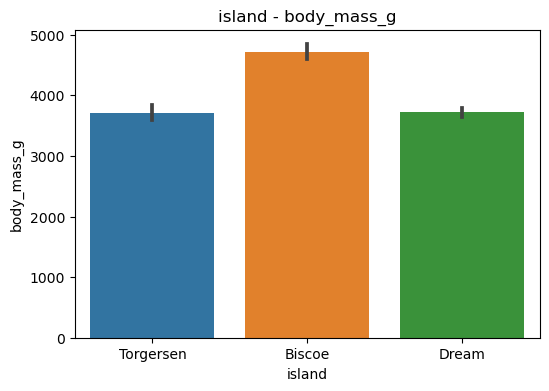

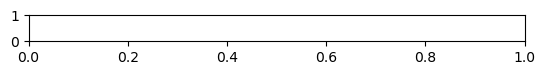

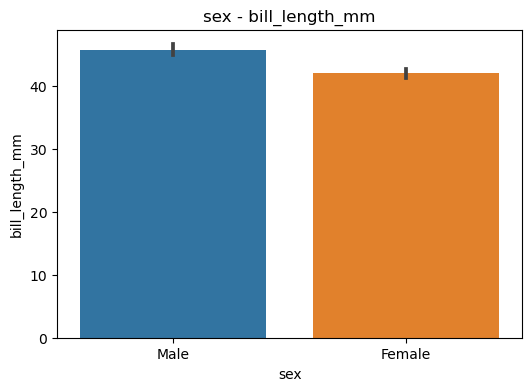

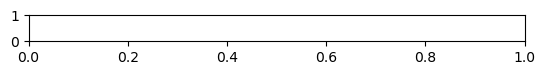

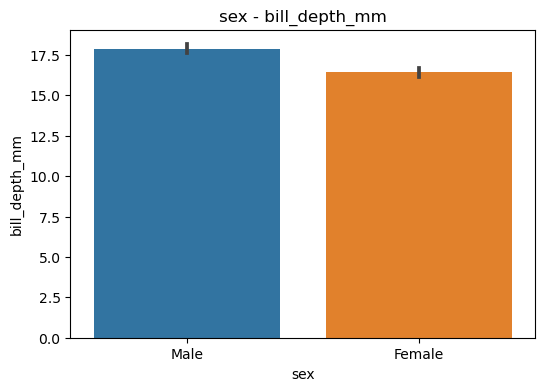

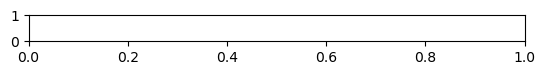

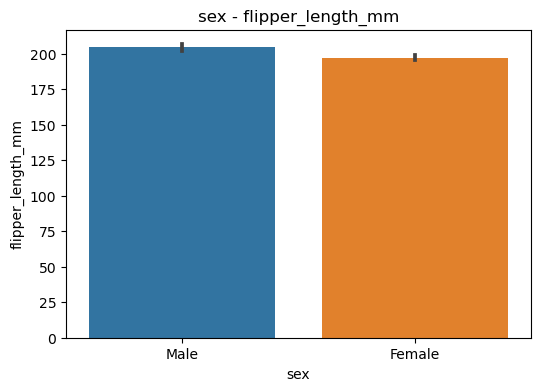

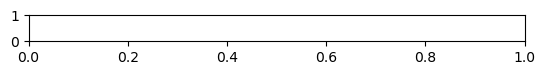

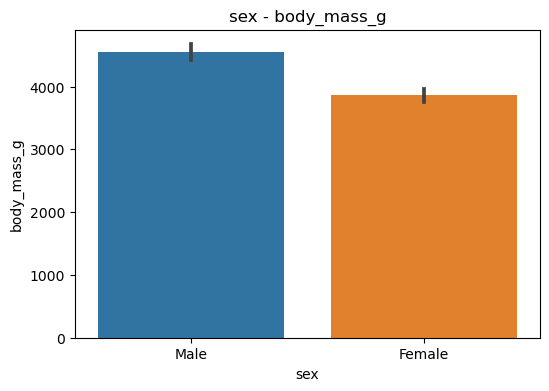

In [66]:
sayac = 1
for i in cat_list:
    for j in num_list:
        plt.subplot(len(cat_list) * len(num_list), 1, sayac)
        plt.figure(figsize = (6, 4))
        plt.title(f"{i} - {j}")
        sns.barplot(x = i, y = j, data = df)
        plt.show()
        sayac = sayac + 1

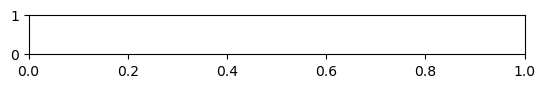

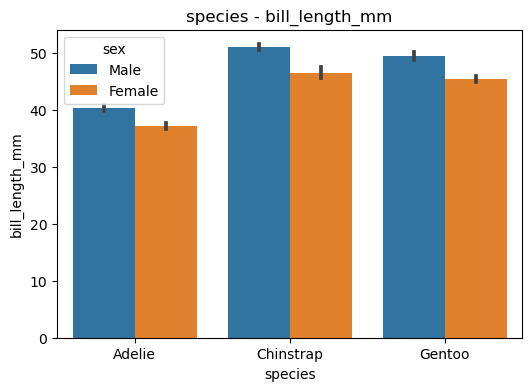

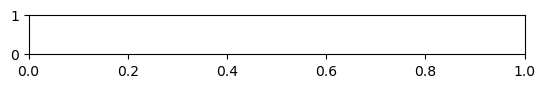

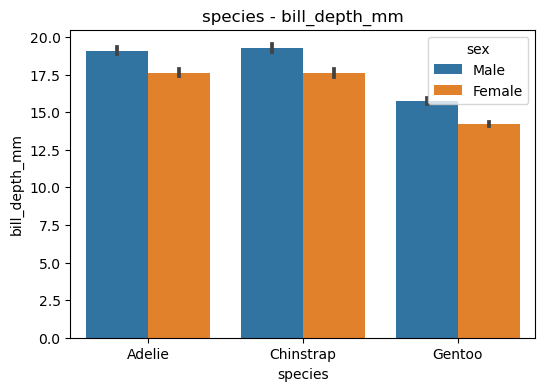

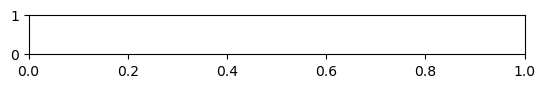

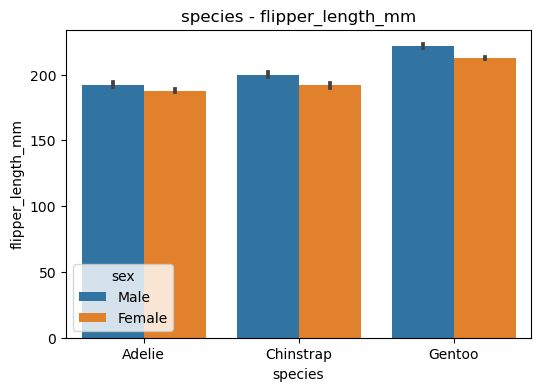

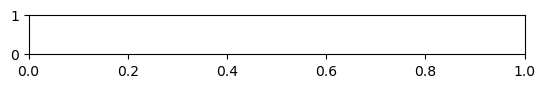

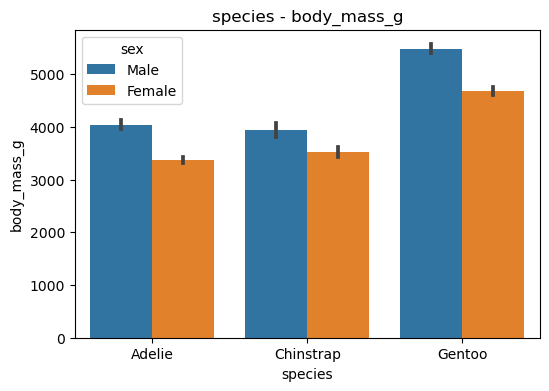

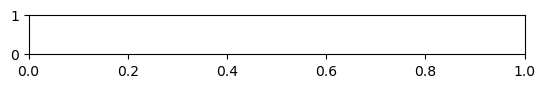

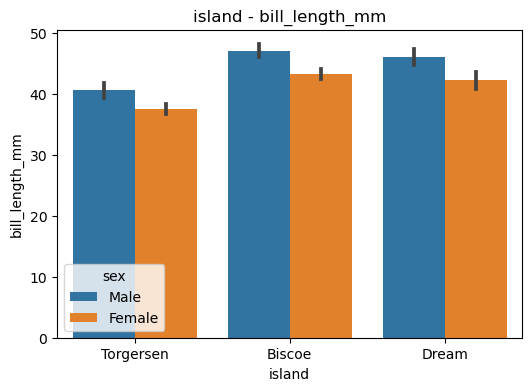

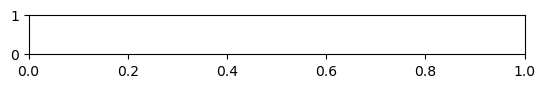

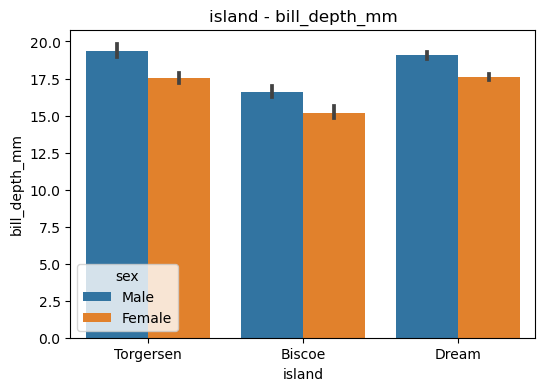

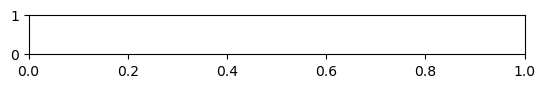

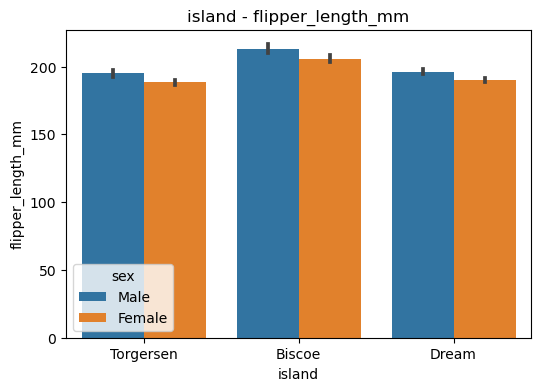

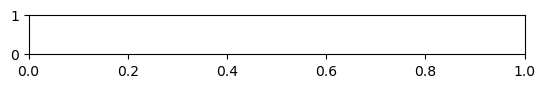

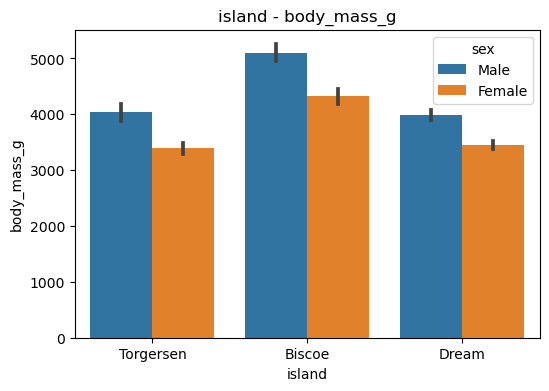

In [69]:
sayac = 1
# cat_list.remove("sex")
for i in cat_list:
    for j in num_list:
        plt.subplot(len(cat_list) * len(num_list), 1, sayac)
        plt.figure(figsize = (6, 4))
        plt.title(f"{i} - {j}")
        sns.barplot(x = i, y = j,hue = "sex", data = df)
        plt.show()
        sayac = sayac + 1

<AxesSubplot:xlabel='species', ylabel='bill_length_mm'>

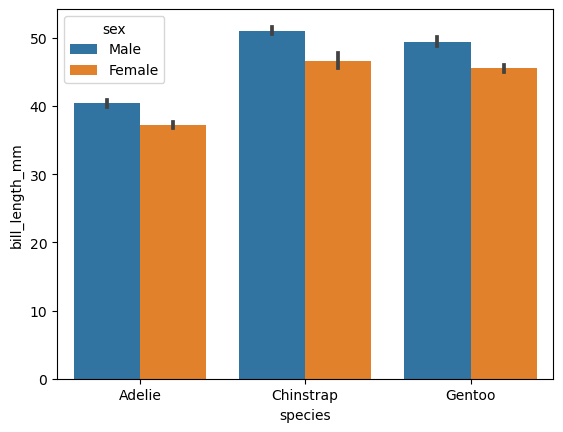

In [63]:
sns.barplot(x = "species", y = "bill_length_mm", hue = "sex", data = df)

# Catplot

In [70]:
num_list =  list(df.select_dtypes(include = ["float64", "int64"]).columns)
cat_list = list(df.select_dtypes(include = ["category", "object"]).columns)

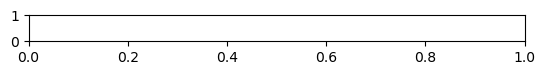

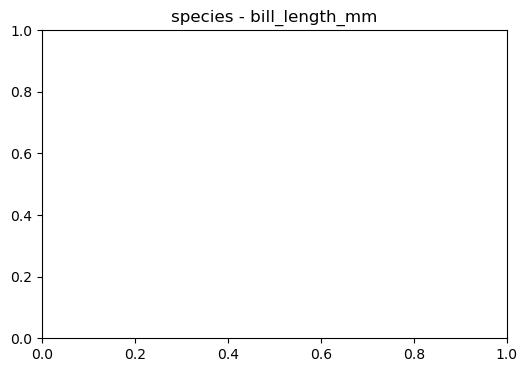

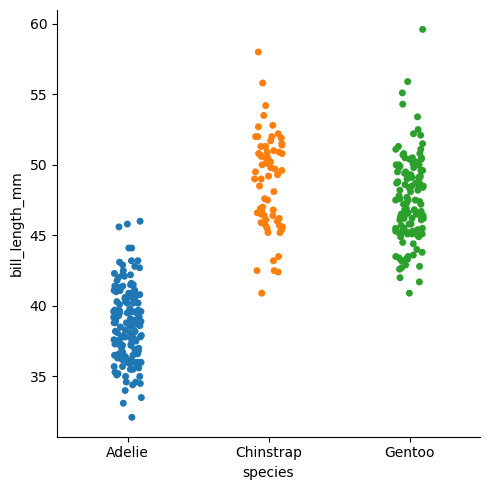

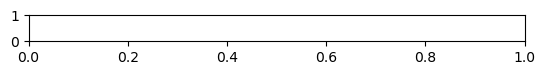

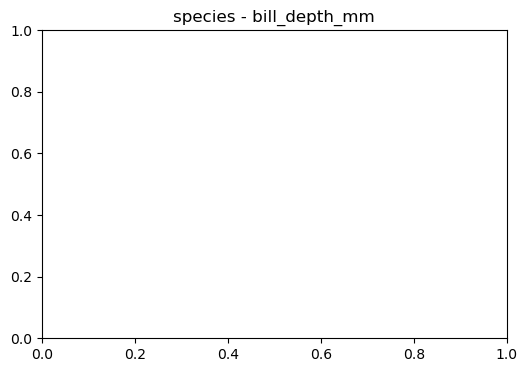

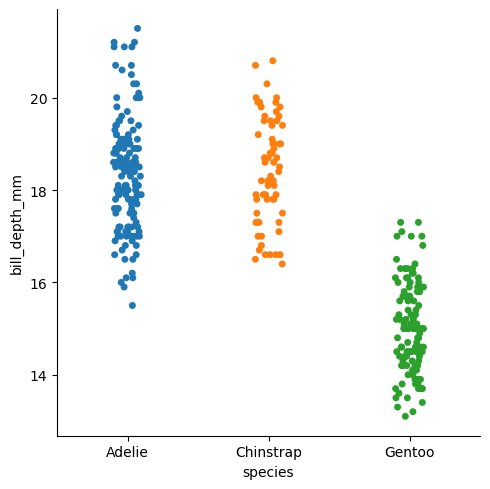

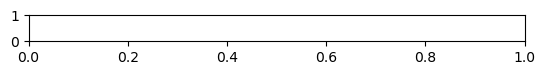

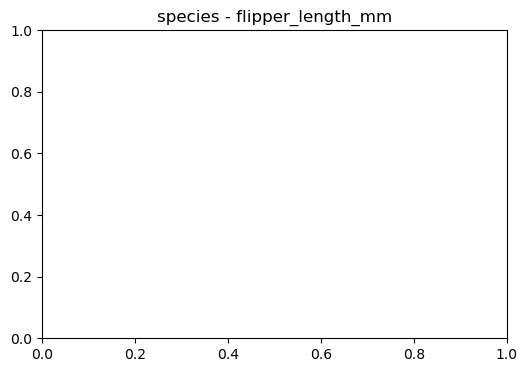

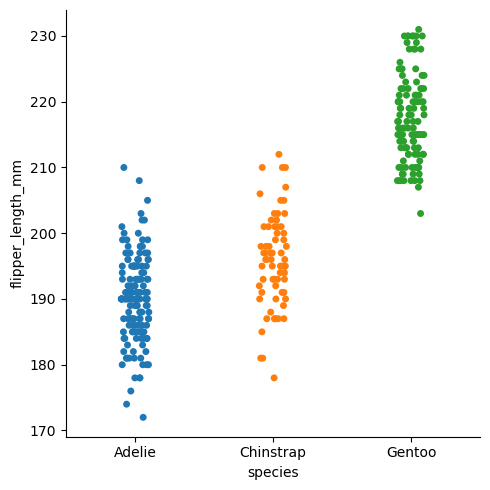

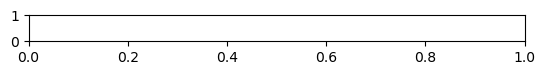

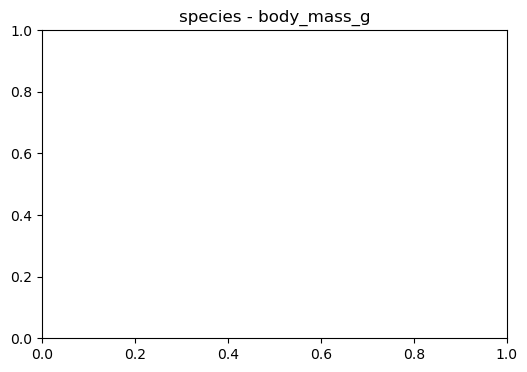

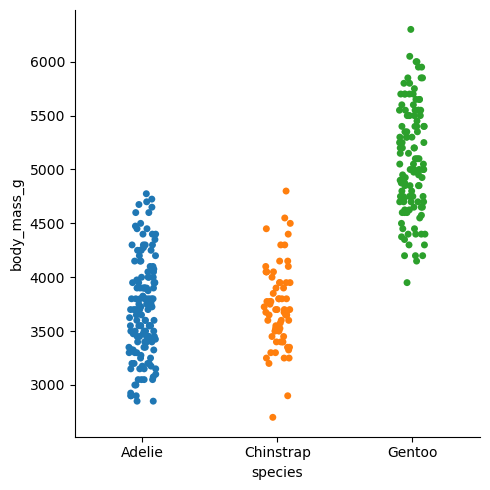

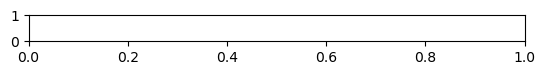

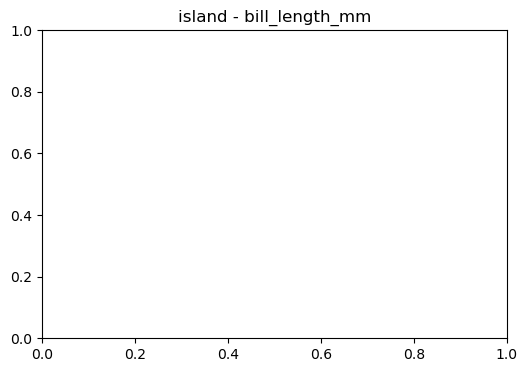

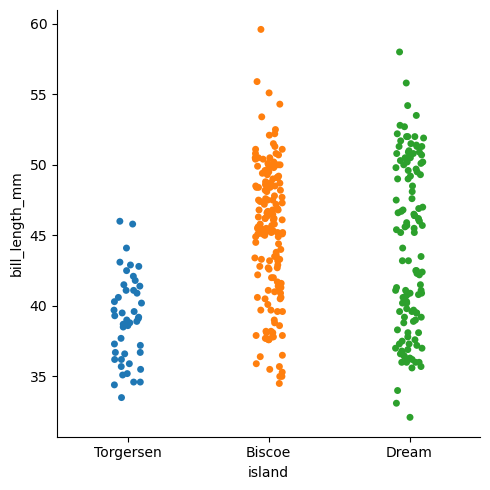

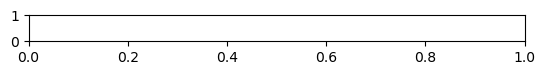

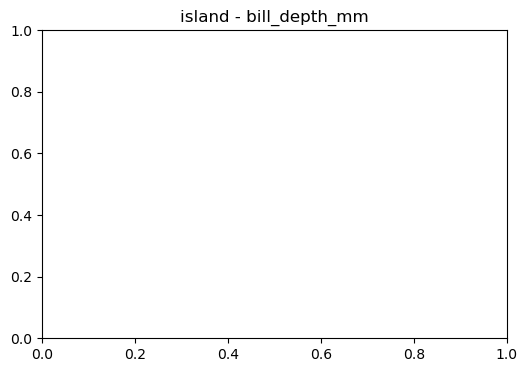

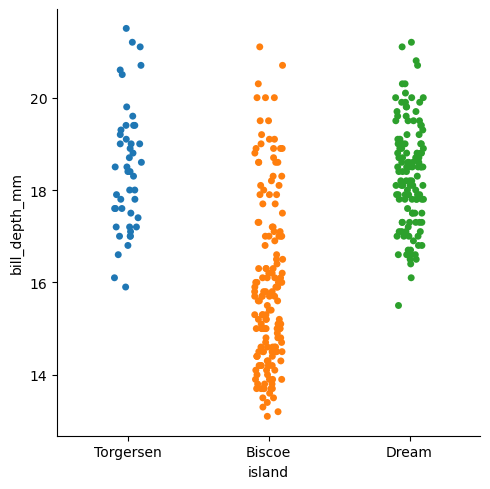

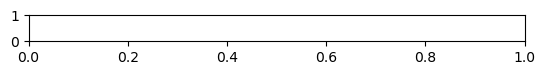

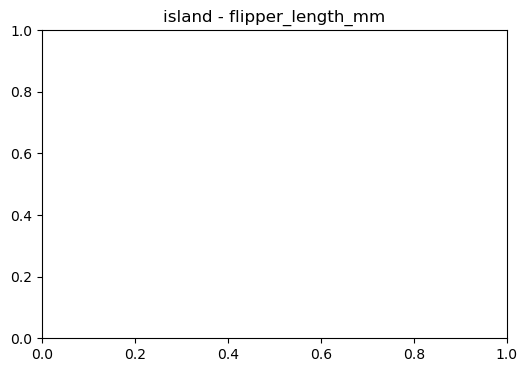

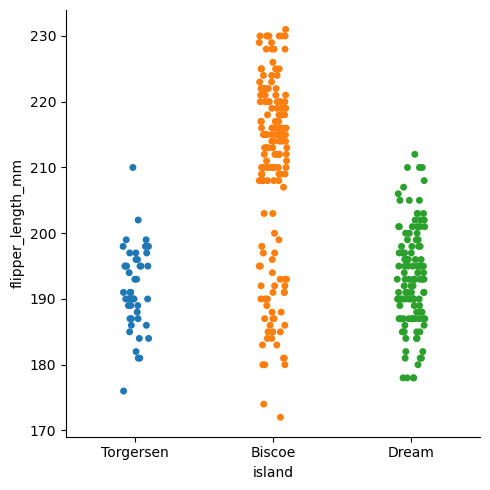

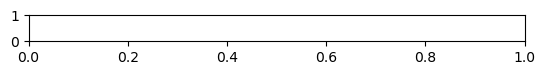

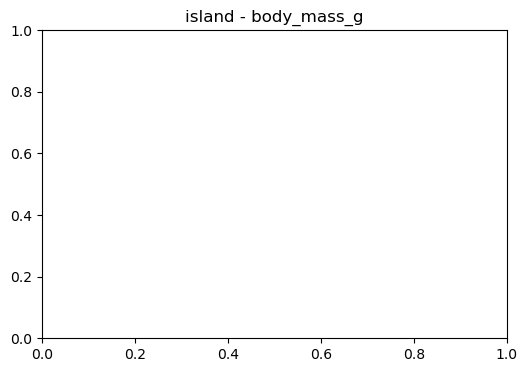

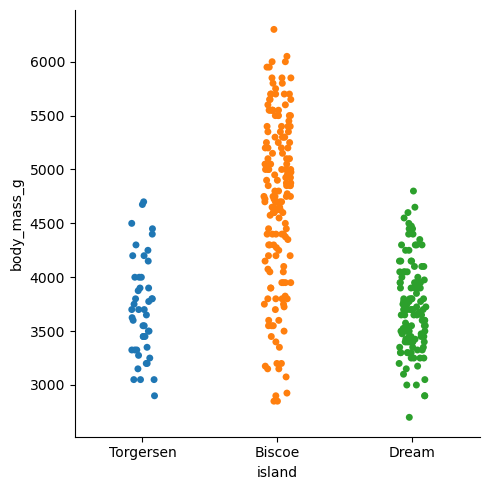

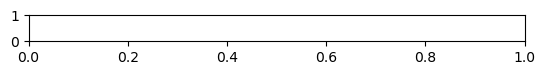

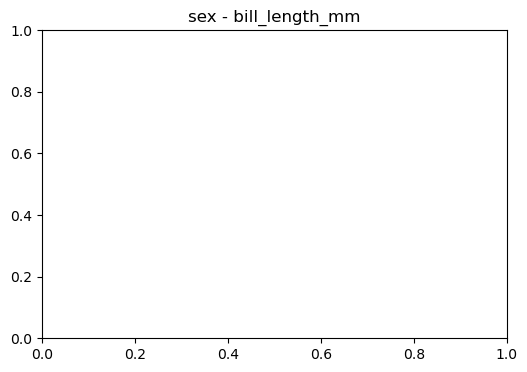

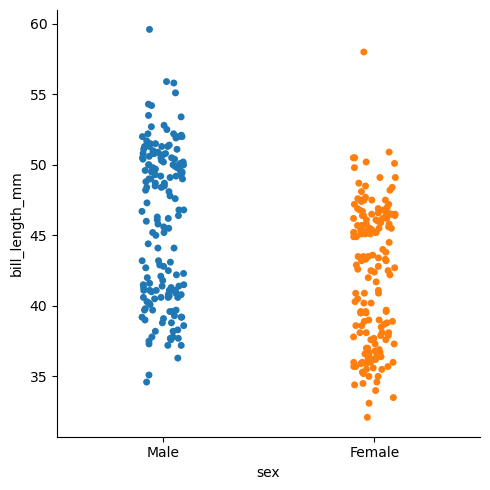

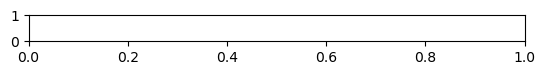

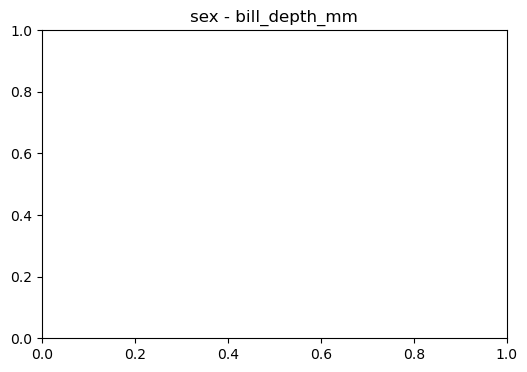

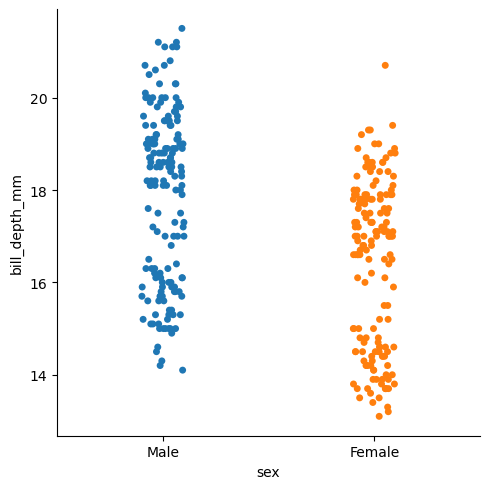

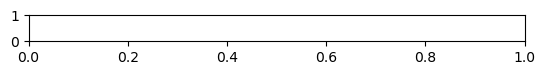

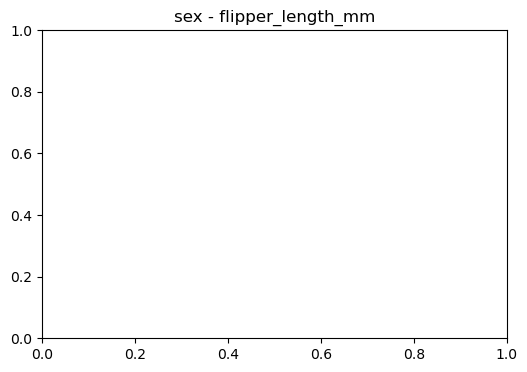

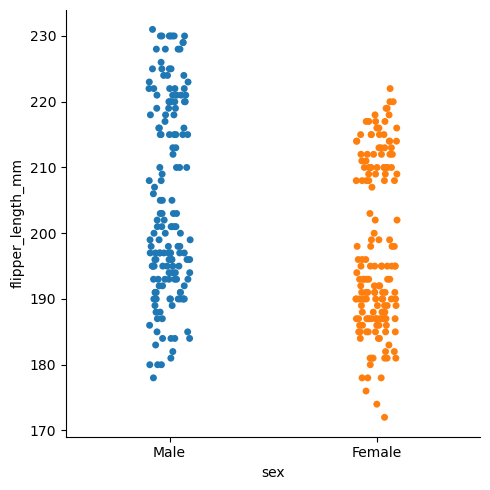

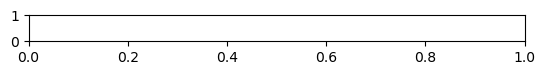

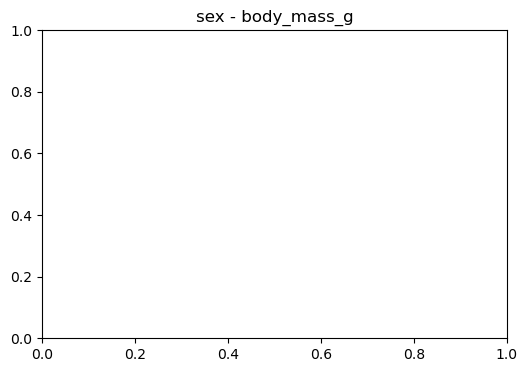

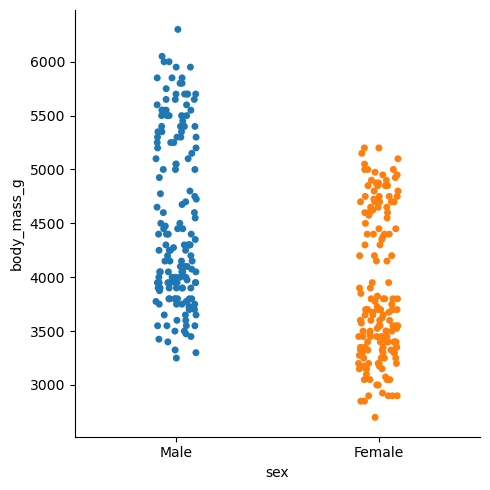

In [73]:
sayac = 1
for i in cat_list:
    for j in num_list:
        plt.subplot(len(cat_list) * len(num_list), 1, sayac)
        plt.figure(figsize = (6, 4))
        plt.title(f"{i} - {j}")
        sns.catplot(x = i, y = j, data = df)
        plt.show()
        sayac = sayac + 1

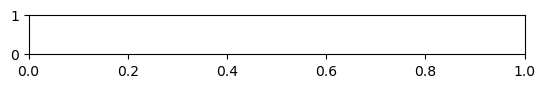

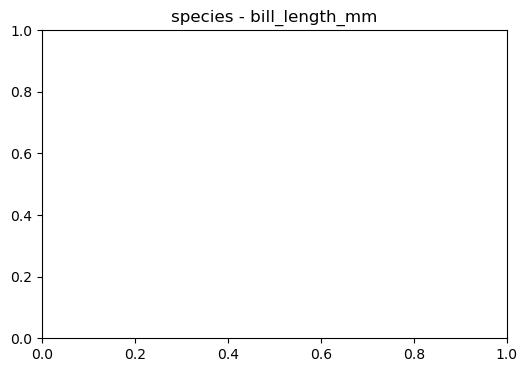

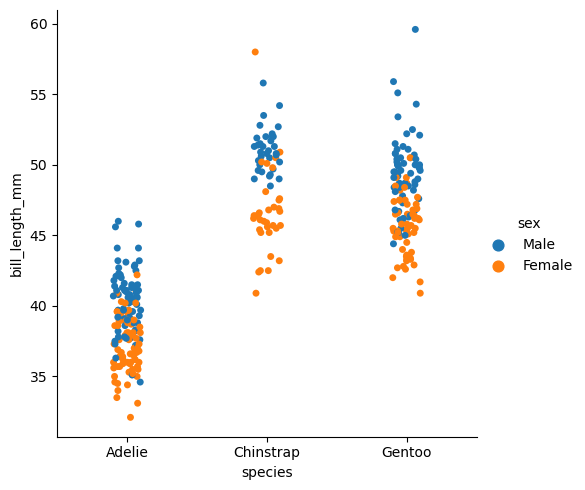

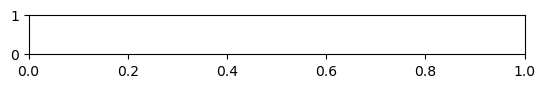

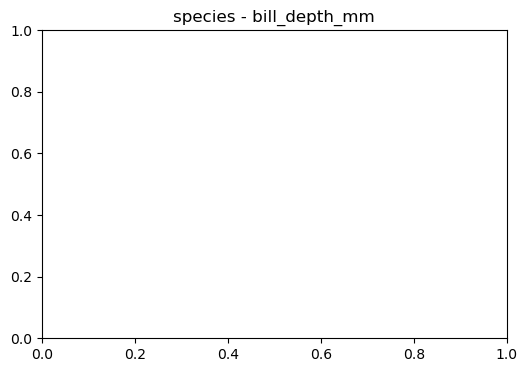

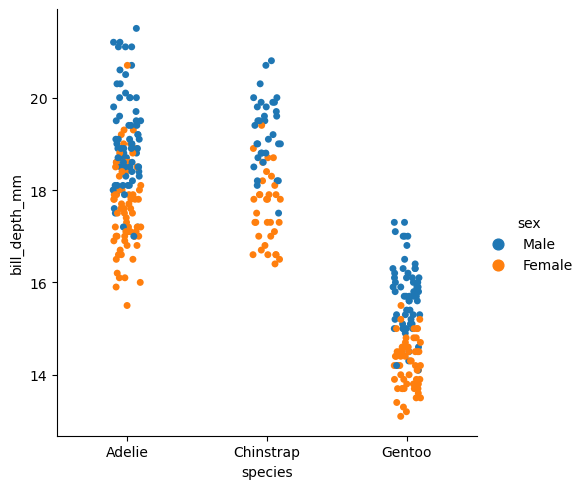

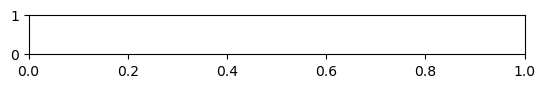

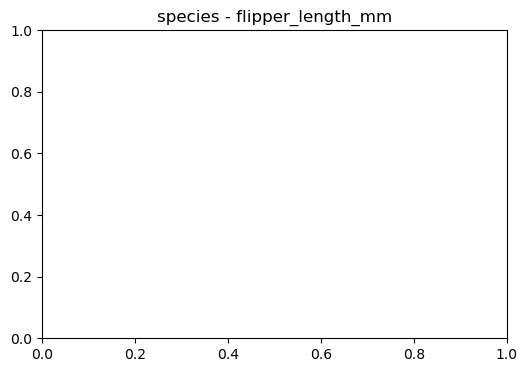

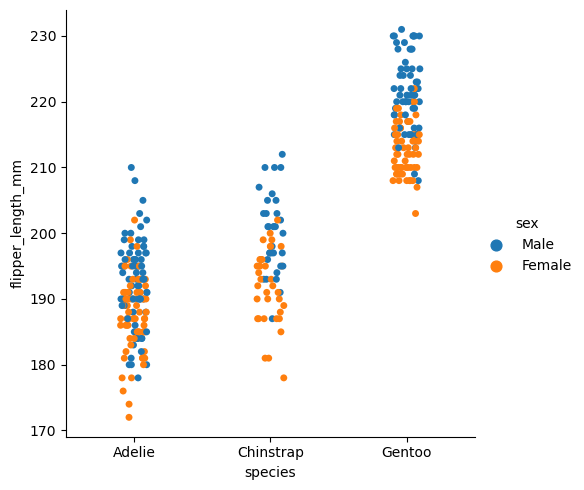

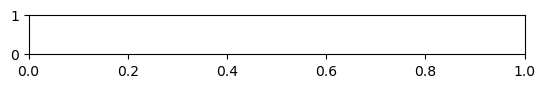

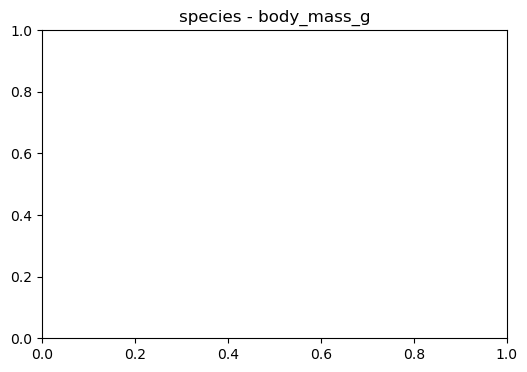

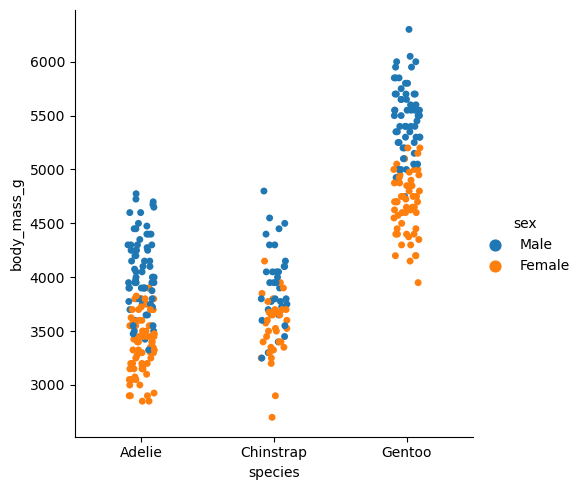

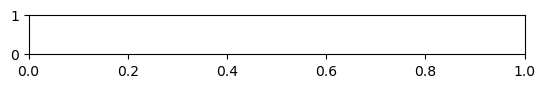

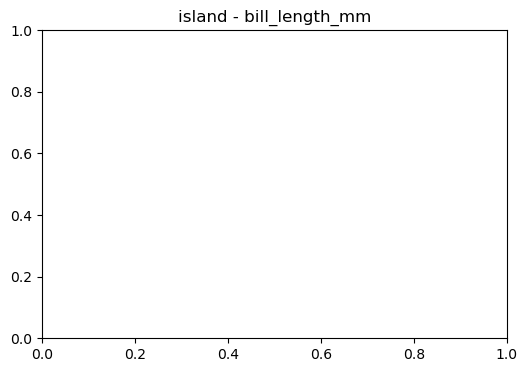

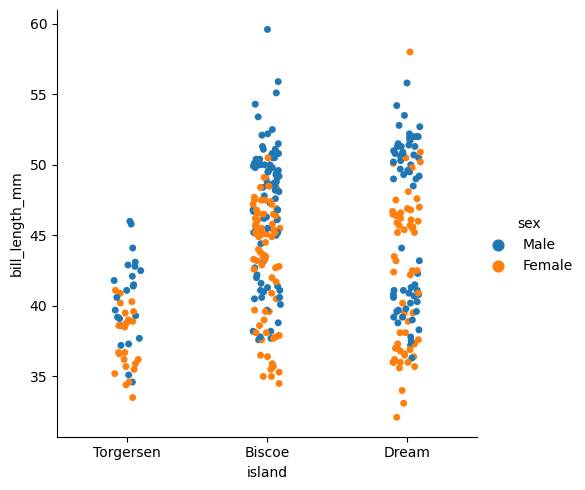

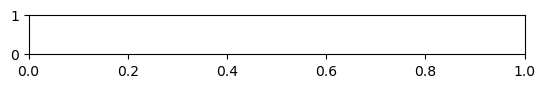

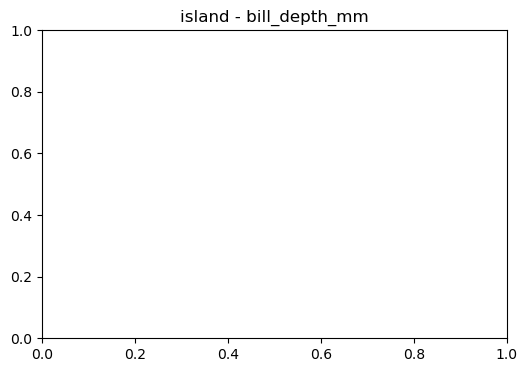

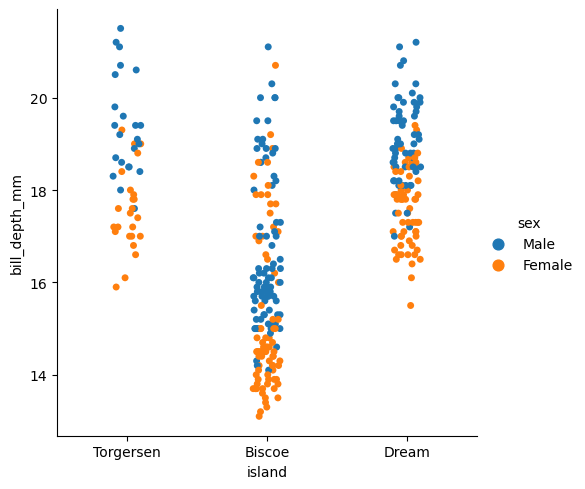

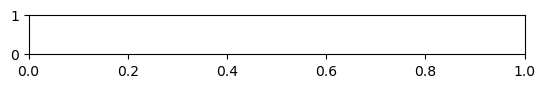

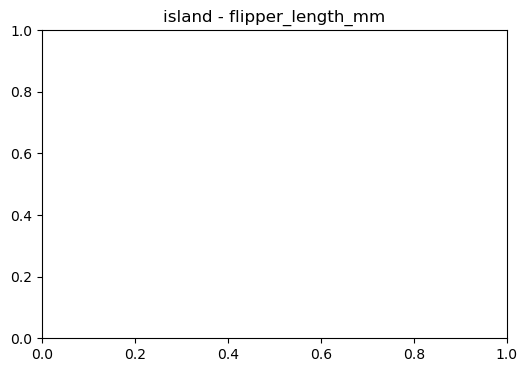

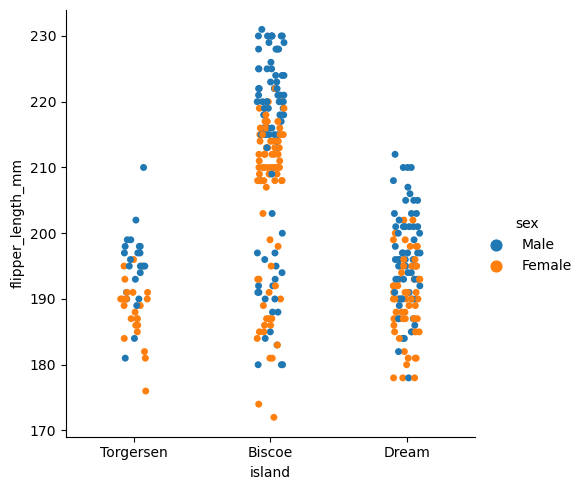

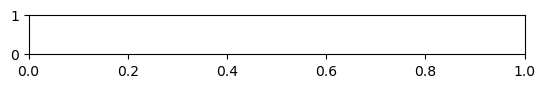

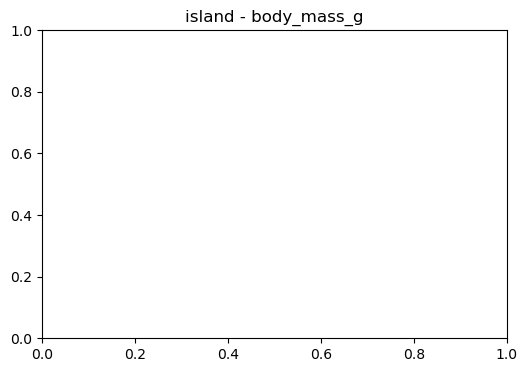

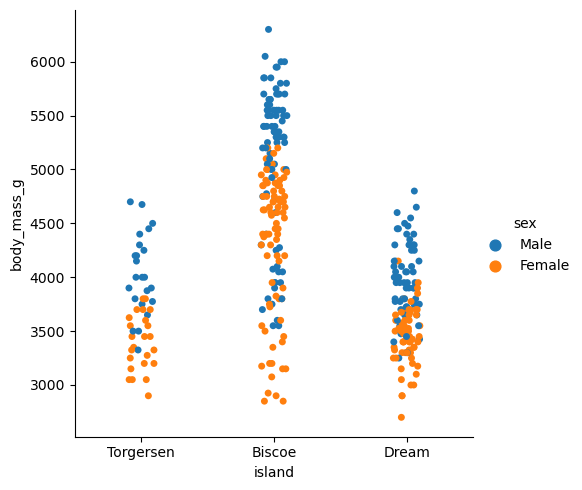

In [75]:
sayac = 1
#cat_list.remove("sex")
for i in cat_list:
    for j in num_list:
        plt.subplot(len(cat_list) * len(num_list), 1, sayac)
        plt.figure(figsize = (6, 4))
        plt.title(f"{i} - {j}")
        sns.catplot(x = i, y = j,hue = "sex", data = df)
        plt.show()
        sayac = sayac + 1

In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 333 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            333 non-null    object 
 1   island             333 non-null    object 
 2   bill_length_mm     333 non-null    float64
 3   bill_depth_mm      333 non-null    float64
 4   flipper_length_mm  333 non-null    float64
 5   body_mass_g        333 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 20.8+ KB


In [77]:
df.groupby("species")[["bill_length_mm", "bill_depth_mm", "flipper_length_mm", "body_mass_g"]].mean()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
species,,,,
Adelie,38.823973,18.347260,190.102740,3706.164384
Chinstrap,48.833824,18.420588,195.823529,3733.088235
Gentoo,47.568067,14.996639,217.235294,5092.436975


In [78]:
df.groupby(["species", "island", "sex"])[["bill_length_mm", "bill_depth_mm", "flipper_length_mm", "body_mass_g"]].mean()

bill_length_mm  bill_depth_mm  flipper_length_mm  \
species   island    sex                                                        
Adelie    Biscoe    Female       37.359091      17.704545         187.181818   
                    Male         40.590909      19.036364         190.409091   
          Dream     Female       36.911111      17.618519         187.851852   
                    Male         40.071429      18.839286         191.928571   
          Torgersen Female       37.554167      17.550000         188.291667   
                    Male         40.586957      19.391304         194.913043   
Chinstrap Dream     Female       46.573529      17.588235         191.735294   
                    Male         51.094118      19.252941         199.911765   
Gentoo    Biscoe    Female       45.563793      14.237931         212.706897   
                    Male         49.473770      15.718033         221.540984   

                            body_mass_g  
species   island    sex                  
Adelie    Biscoe    Female  3369.318182  
                    Male    4050.000000  
          Dream     Female  3344.444444  
                    Male    4045.535714  
          Torgersen Female  3395.833333  
                    Male    4034.782609  
Chinstrap Dream     Female  3527.205882  
                    Male    3938.970588  
Gentoo    Biscoe    Female  4679.741379  
                    Male    5484.836066

# Histogram

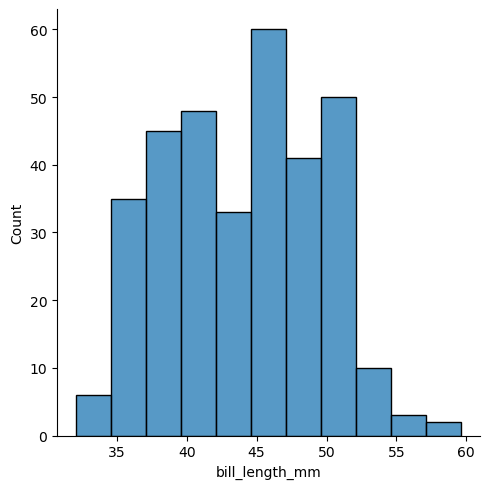

In [79]:
sns.displot(df.bill_length_mm, kde = False)

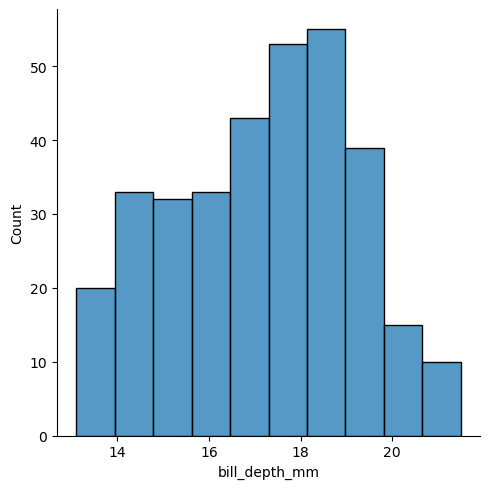

In [81]:
sns.displot(df.bill_depth_mm, kde = False)

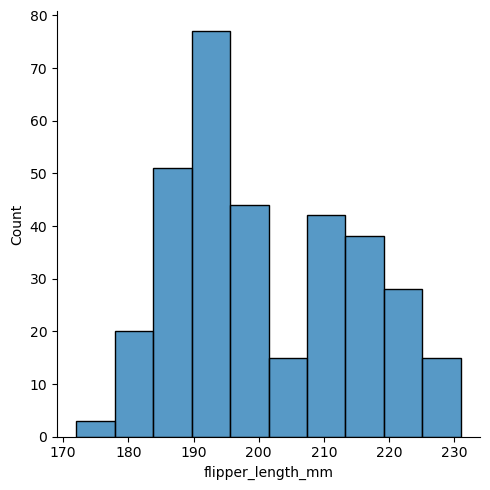

In [82]:
sns.displot(df.flipper_length_mm, kde = False)

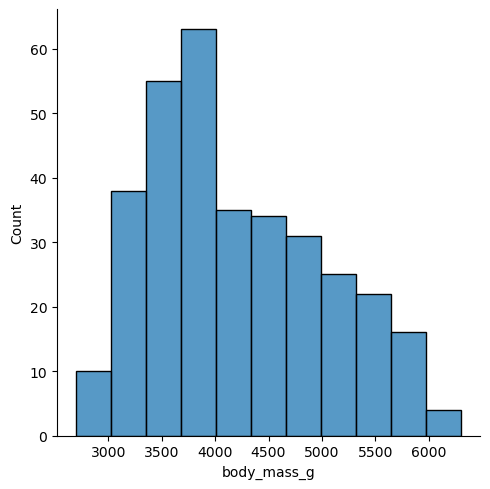

In [83]:
sns.displot(df.body_mass_g, kde = False)

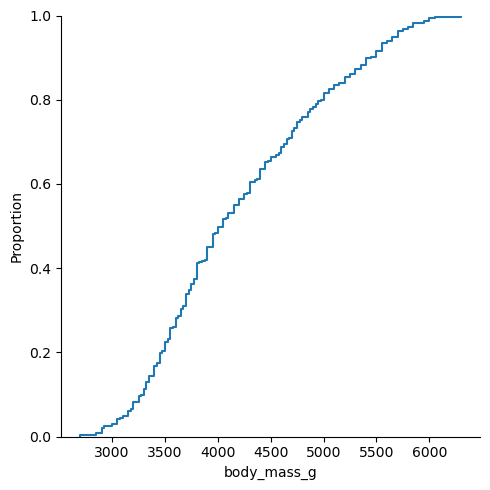

In [84]:
sns.displot(data = df, x = "body_mass_g", kind = "ecdf")

# Boxplot

<AxesSubplot:xlabel='body_mass_g'>

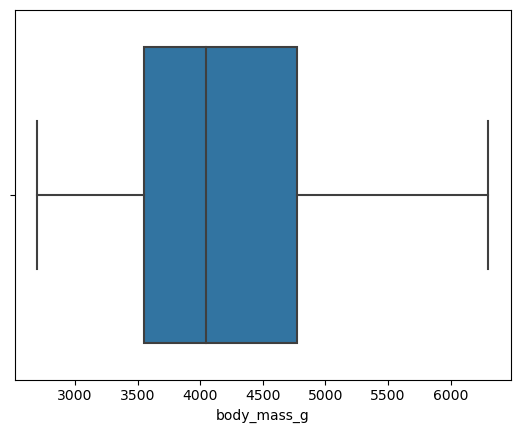

In [85]:
sns.boxplot(x = df["body_mass_g"])

In [86]:
num_list =  list(df.select_dtypes(include = ["float64", "int64"]).columns)
cat_list = list(df.select_dtypes(include = ["category", "object"]).columns)

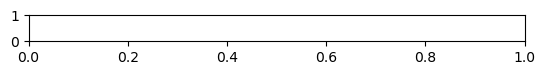

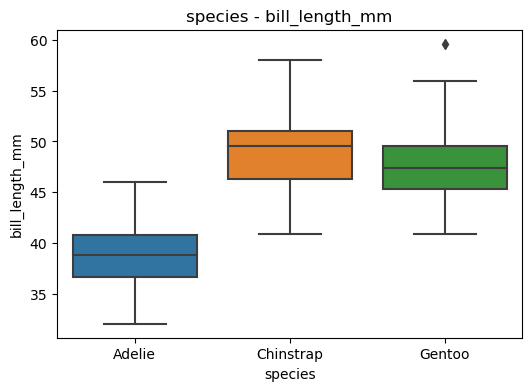

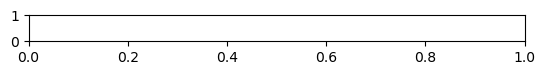

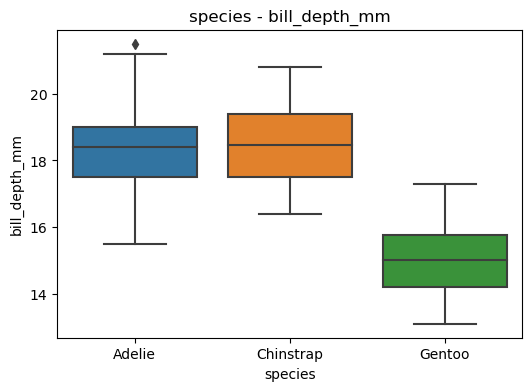

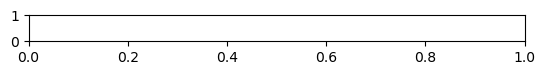

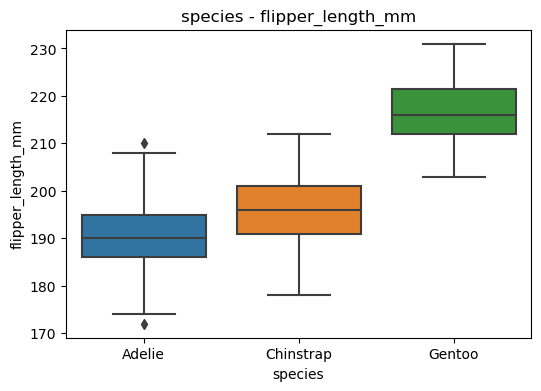

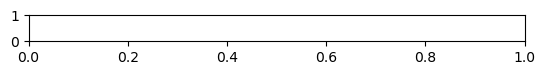

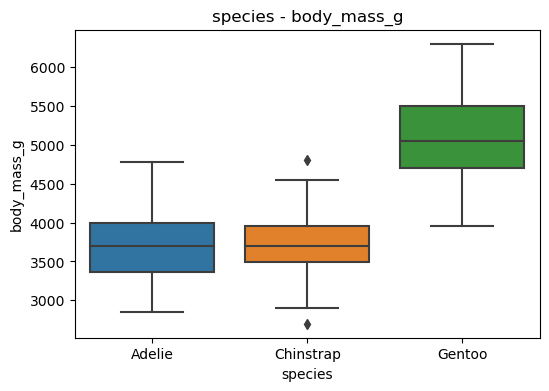

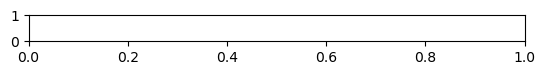

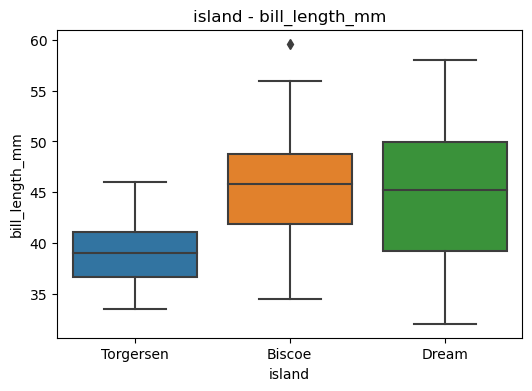

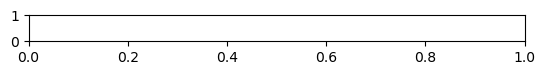

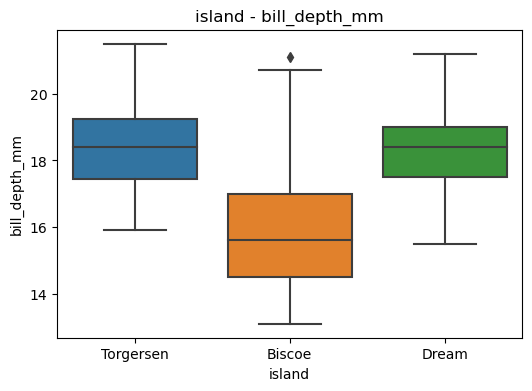

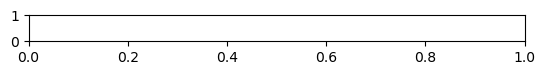

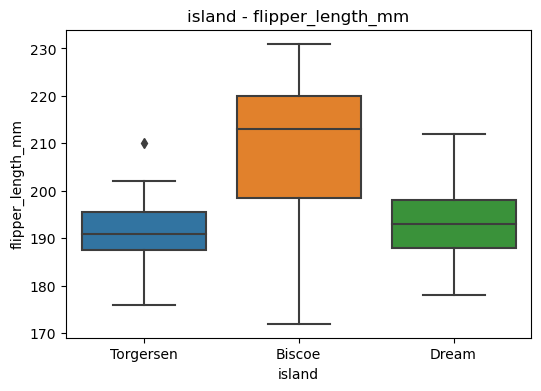

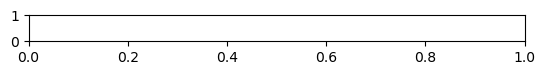

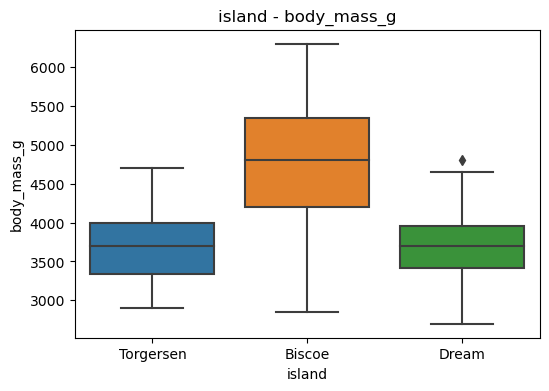

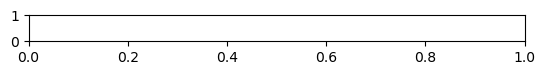

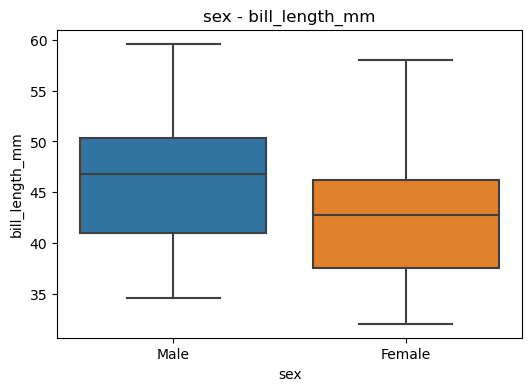

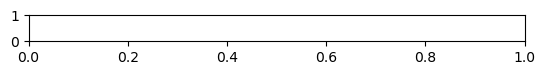

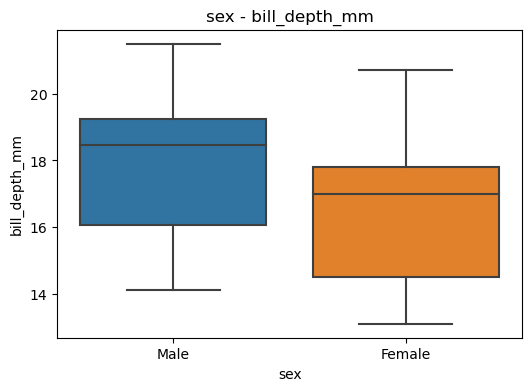

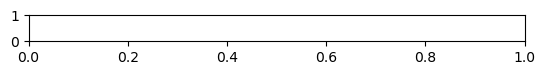

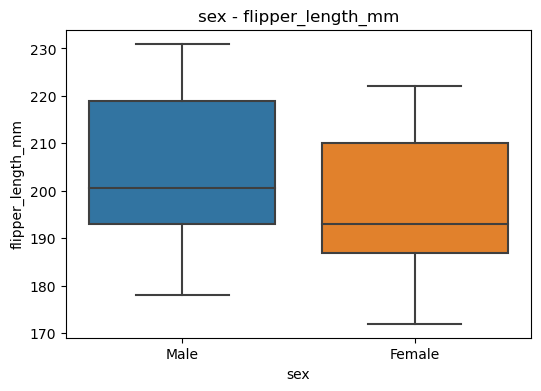

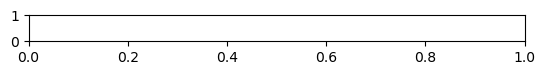

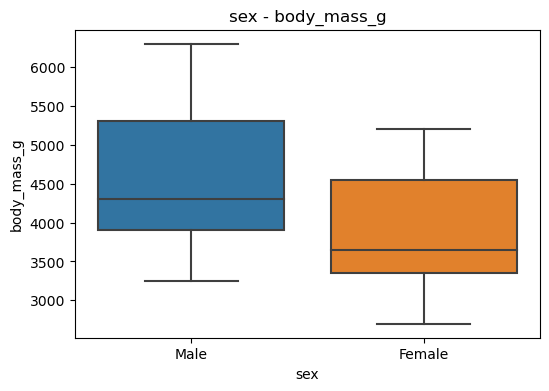

In [89]:
sayac = 1
for i in cat_list:
    for j in num_list:
        plt.subplot(len(cat_list) * len(num_list), 1, sayac)
        plt.figure(figsize = (6, 4))
        plt.title(f"{i} - {j}")
        sns.boxplot(x = i, y = j, data = df)
        plt.show()
        sayac = sayac + 1


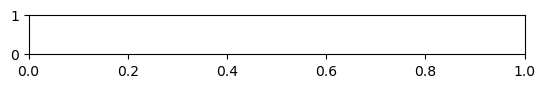

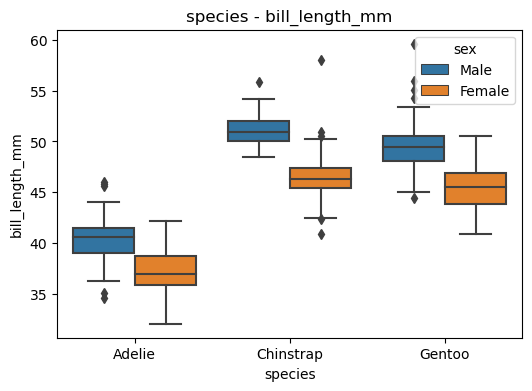

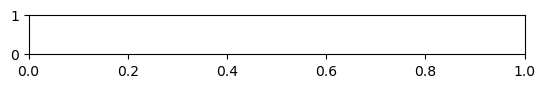

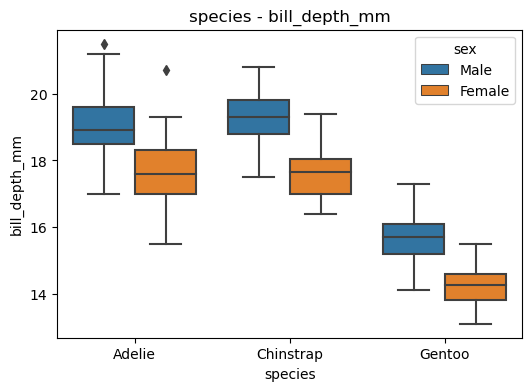

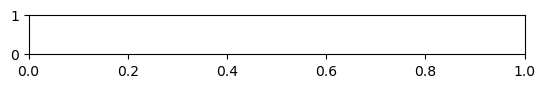

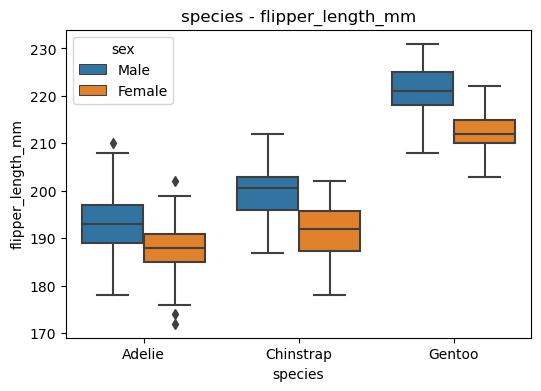

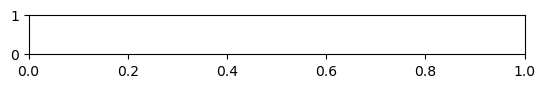

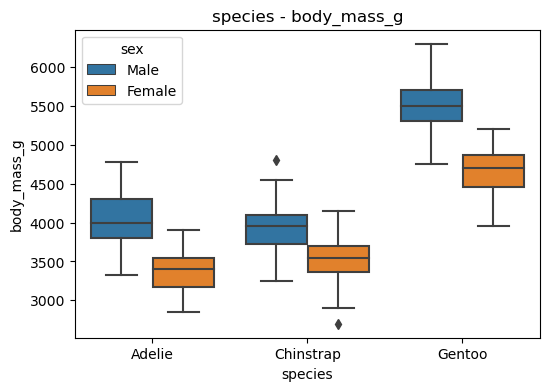

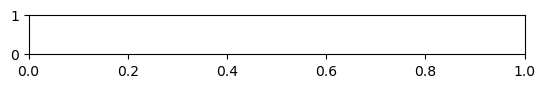

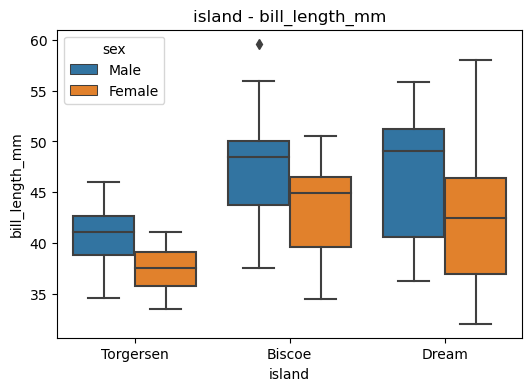

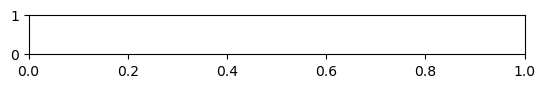

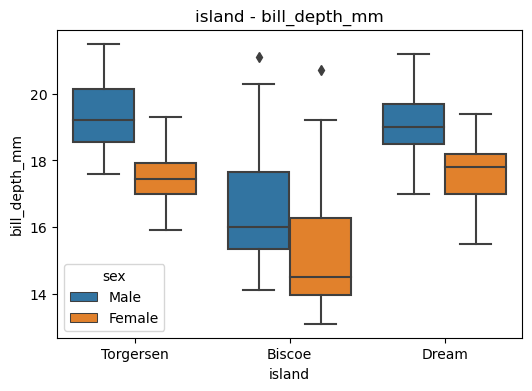

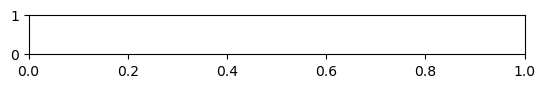

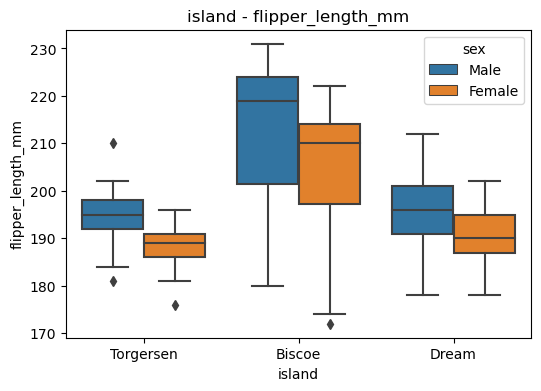

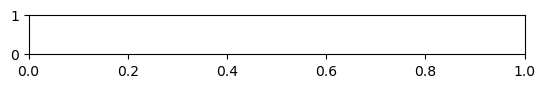

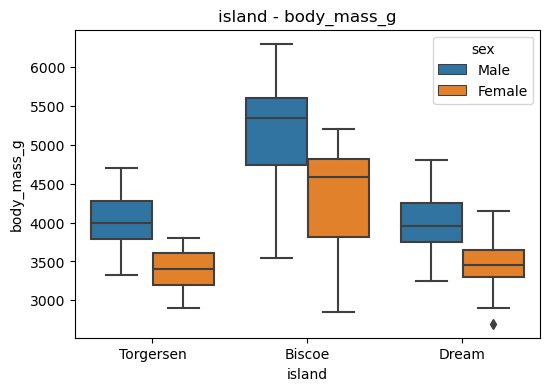

In [90]:
sayac = 1
cat_list.remove("sex")
for i in cat_list:
    for j in num_list:
        plt.subplot(len(cat_list) * len(num_list), 1, sayac)
        plt.figure(figsize = (6, 4))
        plt.title(f"{i} - {j}")
        sns.boxplot(x = i, y = j,hue = "sex", data = df)
        plt.show()
        sayac = sayac + 1